#Camilloni Andrea - 10866376

**Exercise 1**

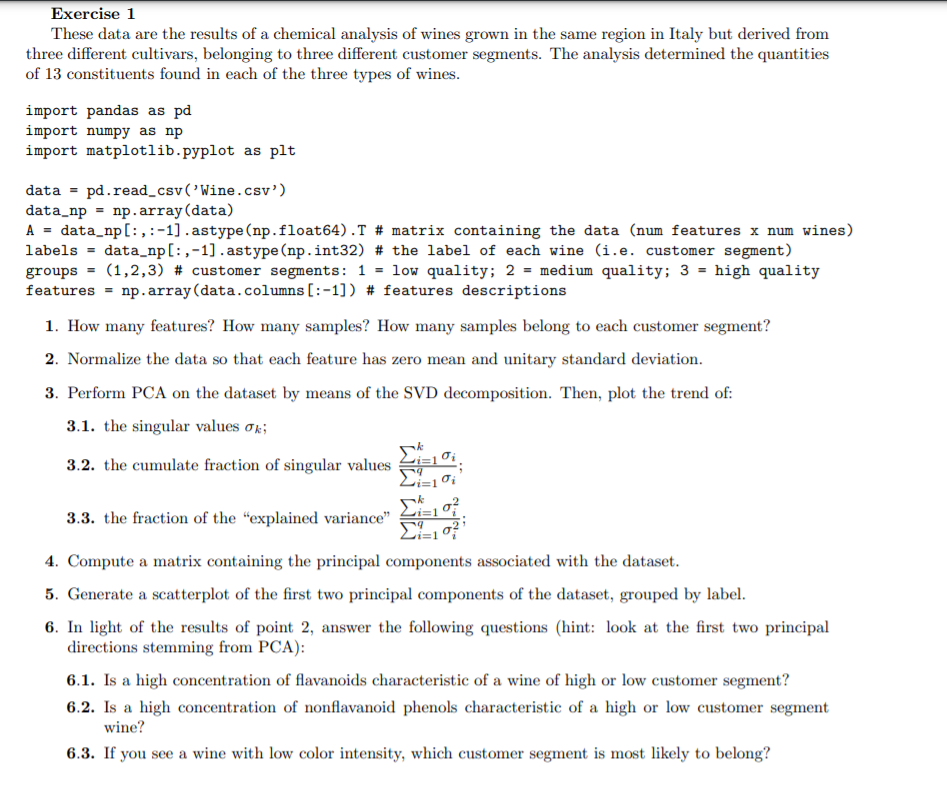

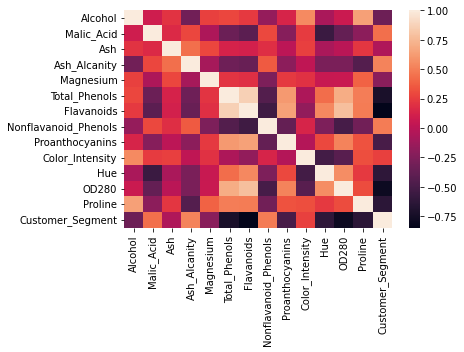

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
data = pd.read_csv('Wine.csv')
data_np = np.array(data)
A = data_np[:,:-1].astype(np.float64).T # matrix containing the data (num features x num wines)
labels = data_np[:,-1].astype(np.int32) # the label of each wine (i.e. customer segment)
groups = (1,2,3) # customer segments: 1 = low quality; 2 = medium quality; 3 = high quality
features = np.array(data.columns[:-1]) # features descriptions


sns.heatmap(data.corr())

In [ ]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [ ]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Point 1

In [16]:
A.shape, labels.shape,features.shape
print("Number of samples %d" % A.shape[1])
print("Number of features %d" % A.shape[0])
[print("Number of samples per group", groups[i], ":", A[:,labels==groups[i]].shape[1]) for i in range(3)]

Number of samples 178
Number of features 13
Number of samples per group 1 : 59
Number of samples per group 2 : 71
Number of samples per group 3 : 48


[None, None, None]

Point 2

In [17]:
A_mean = np.mean(A, axis=1)[:,None]
A_std = np.std(A, axis=1)[:,None]
A_norm = (A-A_mean)/A_std
A_norm.shape

(13, 178)

Point 3

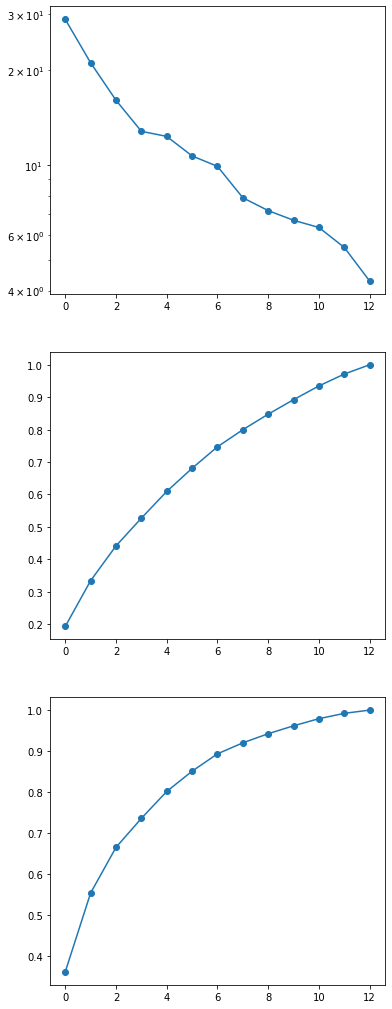

In [18]:
U, s, VT = np.linalg.svd(A_norm,full_matrices=False)

fig, axs = plt.subplots(3,1, figsize=(6,18),)
axs[0].semilogy(s, 'o-')
axs[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axs[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o-')

In [ ]:
##### 
var = (s[0]**2 +s[1]**2)/np.sum(s**2)
var10 = np.sum(s[:7]**2)/np.sum(s**2)
print("Explained variance of first 2 singular values: %1.7f %%"%(var*100))
print("Explained variance of first 7 singular values: %1.7f %%"%(var10*100))
var1 =s[0]**2/np.sum(s**2)
var2 = s[1]**2/np.sum(s**2)
print("Explained variance of first singular value: %1.7f %%"%(var1*100))
print("Explained variance of second singular value: %1.7f %%"%(var2*100))

Explained variance of first 2 singular values: 55.4063384 %
Explained variance of first 7 singular values: 89.3367954 %
Explained variance of first singular value: 36.1988481 %
Explained variance of second singular value: 19.2074903 %


Point 4

In [19]:
Phi = U.T @ A_norm
Phi.shape

(13, 178)

Point 5

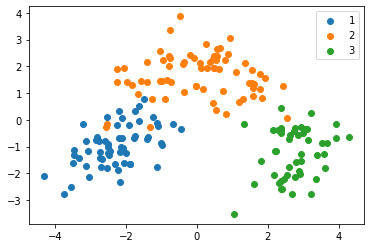

In [20]:
[plt.scatter(Phi[0,labels==groups[i]],Phi[1,labels==groups[i]], label =groups[i]) for i in range(3)]
plt.legend()

Point 6

In [21]:
pd.DataFrame({'features' : features, 'pd1' : U[:, 0], 'pd2' : U[:, 1]}) 

,features,pd1,pd2
0,Alcohol,-0.144329,-0.483652
1,Malic_Acid,0.245188,-0.224931
2,Ash,0.002051,-0.316069
3,Ash_Alcanity,0.239320,0.010591
4,Magnesium,-0.141992,-0.299634
5,Total_Phenols,-0.394661,-0.065040
6,Flavanoids,-0.422934,0.003360
7,Nonflavanoid_Phenols,0.298533,-0.028779
8,Proanthocyanins,-0.313429,-0.039302
9,Color_Intensity,0.088617,-0.529996


In [22]:
#Principal directions
U[:,0].shape, U[:,1].shape, labels

((13,),
 (13,),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3], dtype=int32))

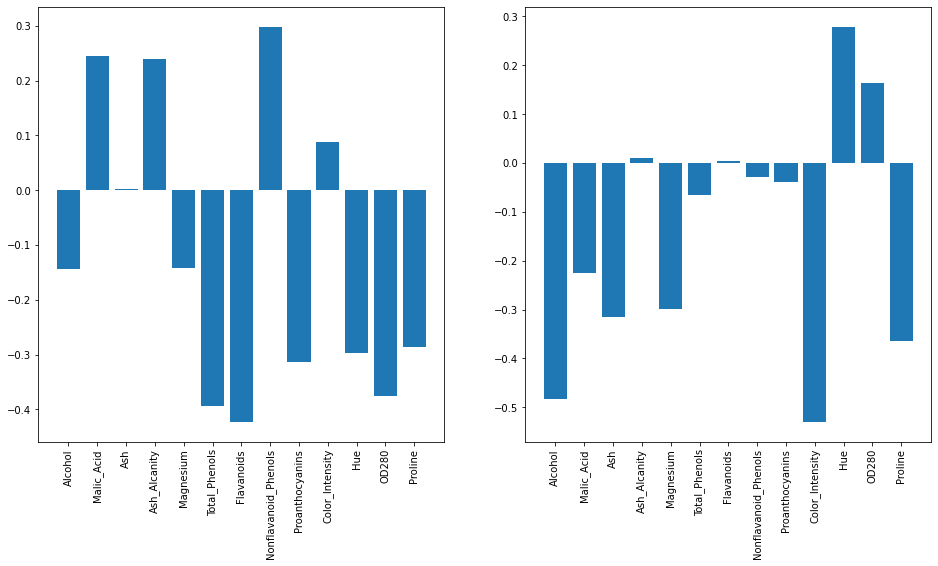

In [23]:
fig, _ax = plt.subplots(1,2,figsize = (16,8))
for i in range(2):
  _ax[i].bar(features, U[:, i])
  _ax[i].set_xticklabels(features, rotation=90)


**6.1** High concentration of flavanoids is characteristic of wines of group 1, since they have a big negatice first component

**6.2** High concentration of nonflavanoid is characteristic of wines of group 3

**6.3** Wines with low color intensity belong to group 3

This is also confirmed by data

In [26]:
labels[np.argmin(Phi[0,:])],labels[np.argmax(Phi[0,:])],labels[np.argmin(Phi[1,:])] #this for point 6.1, 6.2, 6.3

(1, 3, 3)

In [51]:
#I use this just for visualization purpose
pd.DataFrame({'country' : labels[labels==1], '1st comp.' : Phi[0,labels==1], '2nd comp.' : Phi[1,labels==1]})
#pd.DataFrame({'country' : labels[labels==2], '1st comp.' : Phi[0,labels==2], '2nd comp.' : Phi[1,labels==2]})
#pd.DataFrame({'country' : labels[labels==3], '1st comp.' : Phi[0,labels==3], '2nd comp.' : Phi[1,labels==3]})


,country,1st comp.,2nd comp.
0,1,-3.316751,-1.443463
1,1,-2.209465,0.333393
2,1,-2.516740,-1.031151
3,1,-3.757066,-2.756372
4,1,-1.008908,-0.869831
5,1,-3.050254,-2.122401
6,1,-2.449090,-1.174850
7,1,-2.059437,-1.608963
8,1,-2.510874,-0.918071
9,1,-2.753628,-0.789438


**Exercise 2**

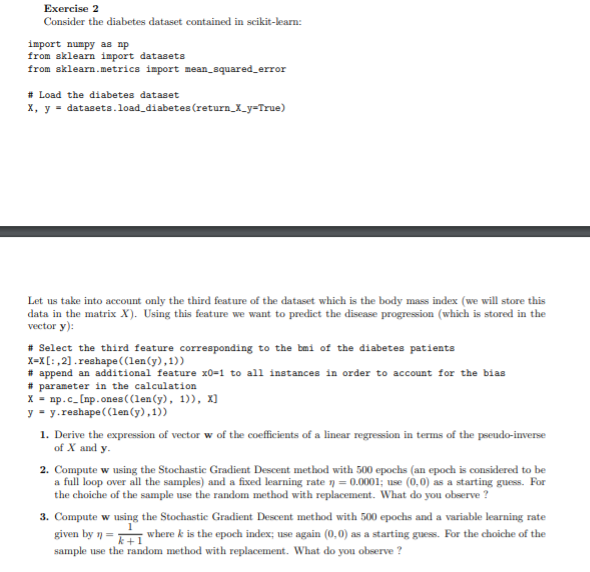

In [30]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import jax.numpy as jnp
import jax
# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

In [31]:
# Select the third feature corresponding to the bmi of the diabetes patients
X=X[:,2].reshape((len(y),1))
# append an additional feature x0=1 to all instances in order to account for the bias
# parameter in the calculation
X = np.c_[np.ones((len(y), 1)), X]
y = y.reshape((len(y),1))

X.shape, y.shape

((442, 2), (442, 1))

Point 1

In [32]:
def pseudo_inv(X):
  U,s,VT = np.linalg.svd(X, full_matrices=False)
  s[s>0] = 1 / s[s>0] 
  return VT.transpose() @ np.diag(s) @ U.transpose()

pseudo_inv(X).shape, y.shape
w = (pseudo_inv(X) @ y).T
w.shape

(1, 2)

Point 2

In [34]:
def MSE(x,y,w):
  return jnp.mean((y - w@x.T)**2)

def error(w_hat,w):
  return jnp.mean((w_hat-w)**2)
  

  0%|          | 0/221000 [00:00<?, ?it/s]

MSE loss 5949.479


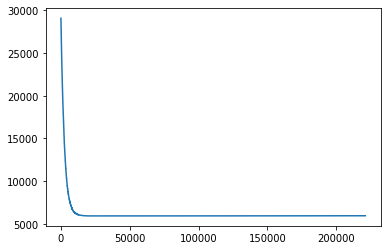

In [40]:
from tqdm.notebook import tqdm
np.random.seed(0)

lr = 1e-4
num_epochs=500 * X.shape[0]

grad_jit = jax.jit(jax.grad(MSE, argnums=2))
loss_jit = jax.jit(MSE)


w0 = np.zeros(w.shape)

history0 = [MSE(X,y,w0)]
historywa = [error(w[0,0],w0[0,0])]
historywb = [error(w[0,1],w0[0,1])]

for e in tqdm(range(num_epochs)):
  idx=np.random.choice(X.shape[0])
  grads = grad_jit(X[idx],y[idx],w0)
  for i in range(len(w0)):
    w0[i] -= lr*grads[i]

  historywa.append(error(w[0,0],w0[0,0]))  
  historywb.append(error(w[0,1],w0[0,1]))
  history0.append(loss_jit(X,y,w0))  

plt.plot(history0)
print("MSE loss %1.3f" % history0[-1])

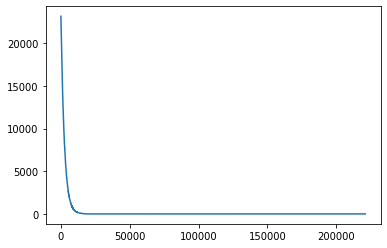

In [41]:
plt.plot(historywa)

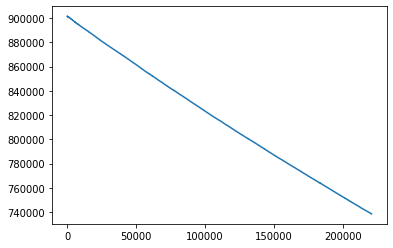

In [42]:
plt.plot(historywb)

We can observe a rapid decrease of the loss and then it stops "learning".

In [ ]:
print(w0)

[[153.25057983  90.05194855]]


Point 3

  0%|          | 0/221000 [00:00<?, ?it/s]

MSE loss 5959.284


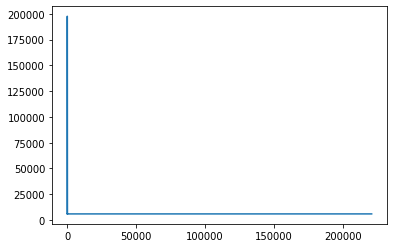

In [46]:

np.random.seed(0)

lr = 1
num_epochs=500 * X.shape[0]

grad_jit = jax.jit(jax.grad(MSE, argnums=2))
loss_jit = jax.jit(MSE)


w1 = np.zeros(w.shape)

history1 = [MSE(X,y,w0)]
historywa = [error(w[0,0],w1[0,0])]
historywb = [error(w[0,1],w1[0,1])]

for e in tqdm(range(num_epochs)):
  lr = 1/(e+1)
  idx=np.random.choice(X.shape[0])
  grads = grad_jit(X[idx],y[idx],w1)
  for i in range(len(w0)):
    w1[i] -= lr*grads[i]

  
  historywa.append(error(w[0,0],w1[0,0]))  
  historywb.append(error(w[0,1],w1[0,1]))
  history1.append(loss_jit(X,y,w1))  

plt.plot(history1)
print("MSE loss %1.3f" % history1[-1])

In this case we have the same behaviour of the first one, but the decrease is even faster.

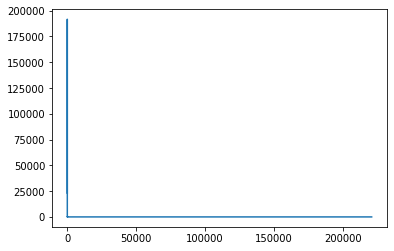

In [52]:
plt.plot(historywa)

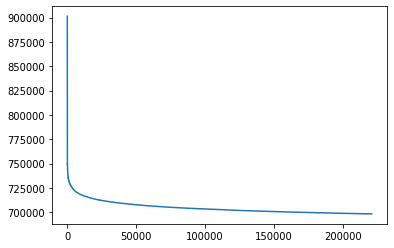

In [53]:
plt.plot(historywb)

In [ ]:
print("MSE loss from point1 %1.3f" % history0[-1])
print("MSE loss from point2 %1.3f" % history1[-1])

MSE loss from point1 5949.479
MSE loss from point2 5959.284


In [ ]:
print(w,w0,w1)

[[152.13348416 949.43526038]] [[153.25057983  90.05194855]] [[152.39431763 113.86289215]]
